In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file = pd.read_csv('happiness-report.csv')
file.dtypes

Country                   object
Region                    object
Year                       int64
Happiness_Rank             int64
Happiness_Score          float64
GDP_Per_Capita           float64
Family                   float64
Life_Expectancy          float64
Freedom                  float64
Government_Corruption    float64
Generosity               float64
Dystopia_Residual        float64
dtype: object

In [32]:
file.sample(10)

,Country,Region,Year,Happiness_Rank,Happiness_Score,GDP_Per_Capita,Family,Life_Expectancy,Freedom,Government_Corruption,Generosity,Dystopia_Residual
158,Denmark,Western Europe,2016,1,7.526,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
154,Benin,Sub-Saharan Africa,2015,155,3.340,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
91,Morocco,Middle East and Northern Africa,2015,92,5.013,0.73479,0.64095,0.60954,0.41691,0.08546,0.07172,2.45373
263,Zambia,Sub-Saharan Africa,2016,106,4.795,0.61202,0.63760,0.23573,0.42662,0.11479,0.17866,2.58991
27,Qatar,Middle East and Northern Africa,2015,28,6.611,1.69042,1.07860,0.79733,0.64040,0.52208,0.32573,1.55674
143,Niger,Sub-Saharan Africa,2015,144,3.845,0.06940,0.77265,0.29707,0.47692,0.15639,0.19387,1.87877
121,Ethiopia,Sub-Saharan Africa,2015,122,4.512,0.19073,0.60406,0.44055,0.43450,0.15048,0.24325,2.44876
131,Sri Lanka,Southern Asia,2015,132,4.271,0.83524,1.01905,0.70806,0.53726,0.09179,0.40828,0.67108
309,Rwanda,Sub-Saharan Africa,2016,152,3.515,0.32846,0.61586,0.31865,0.54320,0.50521,0.23552,0.96819
284,Congo (Brazzaville),Sub-Saharan Africa,2016,127,4.236,0.77109,0.47799,0.28212,0.37938,0.09753,0.12077,2.10681


In [33]:
file.describe()

,Year,Happiness_Rank,Happiness_Score,GDP_Per_Capita,Family,Life_Expectancy,Freedom,Government_Corruption,Generosity,Dystopia_Residual
count,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000
mean,2015.498413,79.238095,5.378949,0.899837,0.892647,0.594054,0.399896,0.140532,0.239957,2.212032
std,0.500793,45.538922,1.141531,0.410780,0.286718,0.240790,0.150684,0.115490,0.130077,0.558728
min,2015.000000,1.000000,2.839000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,2015.000000,40.000000,4.510000,0.594900,0.739880,0.419645,0.295890,0.061315,0.151430,1.884135
50%,2015.000000,79.000000,5.286000,0.973060,0.937930,0.640450,0.413190,0.106130,0.218540,2.211260
75%,2016.000000,118.500000,6.269000,1.229000,1.087360,0.787640,0.516730,0.178610,0.311450,2.563470
max,2016.000000,158.000000,7.587000,1.824270,1.402230,1.025250,0.669730,0.551910,0.819710,3.837720


In [152]:
#Happiness Score Global Mean, Max and Min grouped by Year (on a scale 0 to 10)

avg_mean = file.groupby(['Year']).mean().Happiness_Score
global_max = file.groupby(['Year']).max()['Happiness_Score']
global_min = file.groupby(['Year']).min()['Happiness_Score']
print('Global mean in 2015: %0.3f and in 2016: %0.3f' % (avg_mean.values[0],avg_mean.values[1]))
print('Global max in 2015: %0.3f and in 2016: %0.3f' % (global_max.values[0], global_max.values[1]))
print('Global min in 2015: %0.3f and in 2016: %0.3f' % (global_min.values[0], global_min.values[1]))

Global mean in 2015: 5.376 and in 2016: 5.382
Global max in 2015: 7.587 and in 2016: 7.526
Global min in 2015: 2.839 and in 2016: 2.905


Text(0.5, 1.0, '2015 Factors Means')

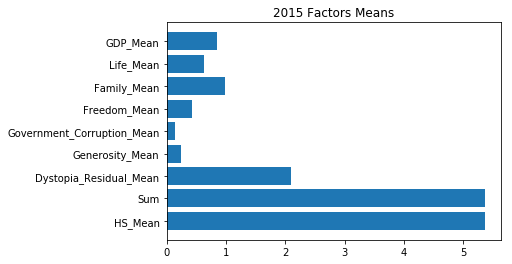

In [273]:
gdp_mean = file.groupby(['Year']).mean().GDP_Per_Capita.values
life_mean = file.groupby(['Year']).mean().Life_Expectancy.values
family_mean = file.groupby(['Year']).mean().Family.values
freedom_mean = file.groupby(['Year']).mean().Freedom.values
gov_mean = file.groupby(['Year']).mean().Government_Corruption.values
gen_mean = file.groupby(['Year']).mean().Generosity.values
dys_mean = file.groupby(['Year']).mean().Dystopia_Residual.values
means = ('GDP_Mean', 'Life_Mean', 'Family_Mean', 'Freedom_Mean','Government_Corruption_Mean', 'Generosity_Mean','Dystopia_Residual_Mean','Sum','HS_Mean')

fig, ax = plt.subplots()
y_pos = np.arange(len(means))
s = gdp_mean[0]+life_mean[0]+family_mean[0]+freedom_mean[0]+gov_mean[0]+gen_mean[0]+dys_mean[0]
summ = [gdp_mean[0], life_mean[0], family_mean[0],freedom_mean[0],gov_mean[0],gen_mean[0],dys_mean[0], s, avg_mean.values[0]]
ax.barh(y_pos, summ)
ax.set_yticks(y_pos)
ax.set_yticklabels(means)
ax.invert_yaxis()
ax.set_title('2015 Factors Means')

Text(0.5, 1.0, '2016 Factors Means')

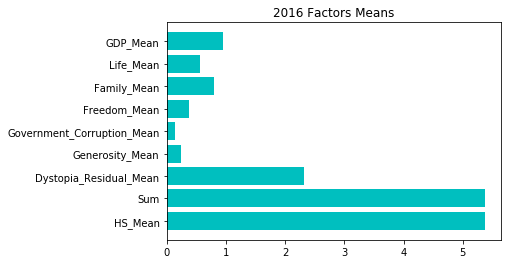

In [275]:
gdp_mean = file.groupby(['Year']).mean().GDP_Per_Capita.values
life_mean = file.groupby(['Year']).mean().Life_Expectancy.values
family_mean = file.groupby(['Year']).mean().Family.values
freedom_mean = file.groupby(['Year']).mean().Freedom.values
gov_mean = file.groupby(['Year']).mean().Government_Corruption.values
gen_mean = file.groupby(['Year']).mean().Generosity.values
dys_mean = file.groupby(['Year']).mean().Dystopia_Residual.values
means = ('GDP_Mean', 'Life_Mean', 'Family_Mean', 'Freedom_Mean','Government_Corruption_Mean', 'Generosity_Mean','Dystopia_Residual_Mean','Sum','HS_Mean')

fig, ax = plt.subplots()
y_pos = np.arange(len(means))
s2 = gdp_mean[1]+life_mean[1]+family_mean[1]+freedom_mean[1]+gov_mean[1]+gen_mean[1]+dys_mean[1]
summ2 = [gdp_mean[1], life_mean[1], family_mean[1],freedom_mean[1],gov_mean[1],gen_mean[1],dys_mean[1], s, avg_mean.values[1]]
ax.barh(y_pos, summ2, color='c')
ax.set_yticks(y_pos)
ax.set_yticklabels(means)
ax.invert_yaxis()
ax.set_title('2016 Factors Means')

Text(0.5, 1.0, 'Comparison 2015-2016 fators contributing Happiness Score')

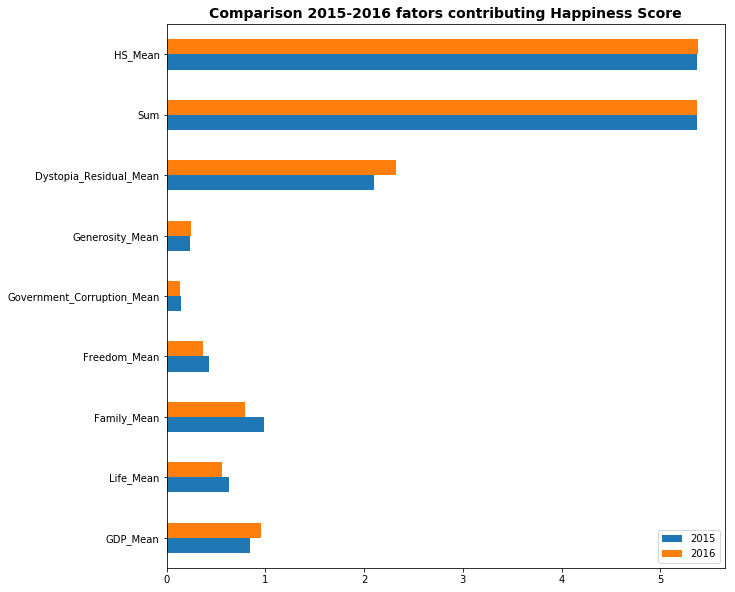

In [291]:
df = pd.DataFrame({'2015': summ, '2016': summ2}, index = means)
ax = df.plot(kind='barh', figsize=(10,10))
ax.set_title('Comparison 2015-2016 fators contributing Happiness Score', weight='bold', size = 14)
